# Import libraries and load data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")

df = pd.read_csv("C:/Users/ASUS/Desktop/Worksho_002/dags/data/lastfm_extracted.csv")
df

,track_name,artist,album,duration,listeners,playcount,artist_tags
0,Take Me to Church,Hozier,NaN,NaN,1876237,22524311,"blues, indie, soul"
1,Too Sweet,Hozier,NaN,NaN,1079013,15152648,"blues, indie, soul"
2,Work Song,Hozier,NaN,NaN,814614,9892751,"blues, indie, soul"
3,Like Real People Do,Hozier,NaN,NaN,807369,10348382,"blues, indie, soul"
4,Someone New,Hozier,NaN,NaN,804064,8049347,"blues, indie, soul"
...,...,...,...,...,...,...,...
1995,how u feel?,Destroy Lonely,NaN,NaN,227276,3731470,"opium, trap, rap"
1996,VETERAN (feat. Ken Carson),Destroy Lonely,NaN,NaN,217331,4084630,"opium, trap, rap"
1997,VTMNTSCOAT,Destroy Lonely,NaN,NaN,171432,2852215,"opium, trap, rap"
1998,In The Air,Destroy Lonely,NaN,NaN,165591,2638795,"opium, trap, rap"


# Data cleaning

Check null values

In [2]:
df.isnull().sum()

track_name        0
artist            0
album          2000
duration       2000
listeners         0
playcount         0
artist_tags       0
dtype: int64

Remove duplicates if they exist

In [3]:
df.drop_duplicates(inplace=True)

# General dataset information

Types of data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   track_name   2000 non-null   object 
 1   artist       2000 non-null   object 
 2   album        0 non-null      float64
 3   duration     0 non-null      float64
 4   listeners    2000 non-null   int64  
 5   playcount    2000 non-null   int64  
 6   artist_tags  2000 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 109.5+ KB


Basic statistics of numeric columns

In [7]:
df.describe()

,album,duration,listeners,playcount
count,0.0,0.0,2.000000e+03,2.000000e+03
mean,NaN,NaN,5.940313e+05,5.823189e+06
std,NaN,NaN,4.284902e+05,6.125710e+06
min,NaN,NaN,2.381300e+04,7.702900e+04
25%,NaN,NaN,2.831500e+05,2.198410e+06
50%,NaN,NaN,4.839115e+05,4.397026e+06
75%,NaN,NaN,7.825812e+05,7.519755e+06
max,NaN,NaN,2.621627e+06,1.470166e+08


# Univariate analysis

Top 10 most popular artists (by plays)

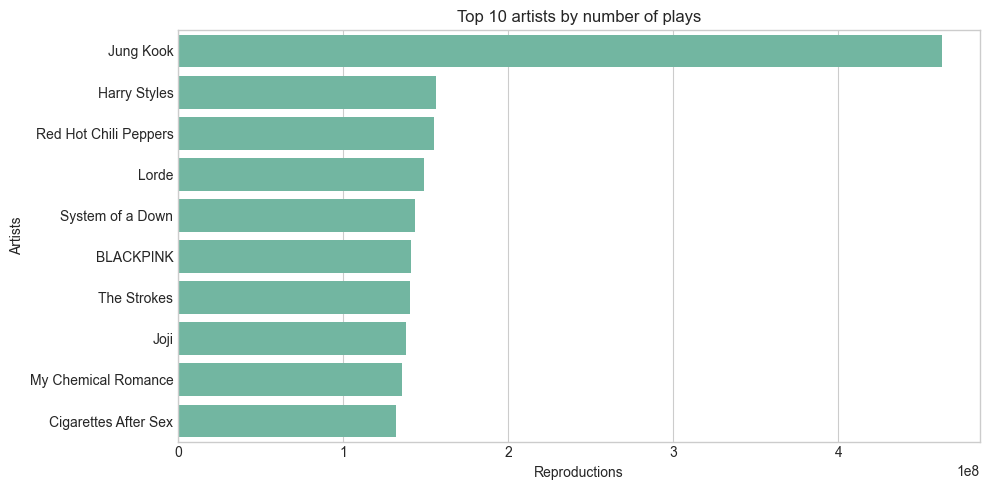

In [20]:
top_artists = df.groupby("artist")["playcount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title("Top 10 artists by number of plays")
plt.xlabel("Reproductions")
plt.ylabel("Artists")
plt.tight_layout()
plt.show()


Most popular songs (top 10 by scrobbles)

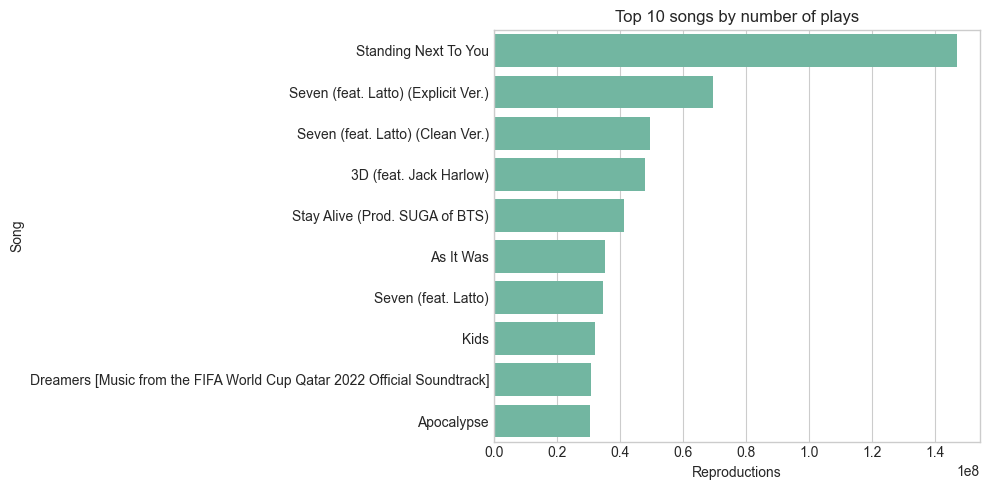

In [19]:
top_tracks = df.groupby("track_name")["playcount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_tracks.values, y=top_tracks.index)
plt.title("Top 10 songs by number of plays")
plt.xlabel("Reproductions")
plt.ylabel("Song")
plt.tight_layout()
plt.show()


#  Bivariate Analysis

Ratio of listeners to reproductions

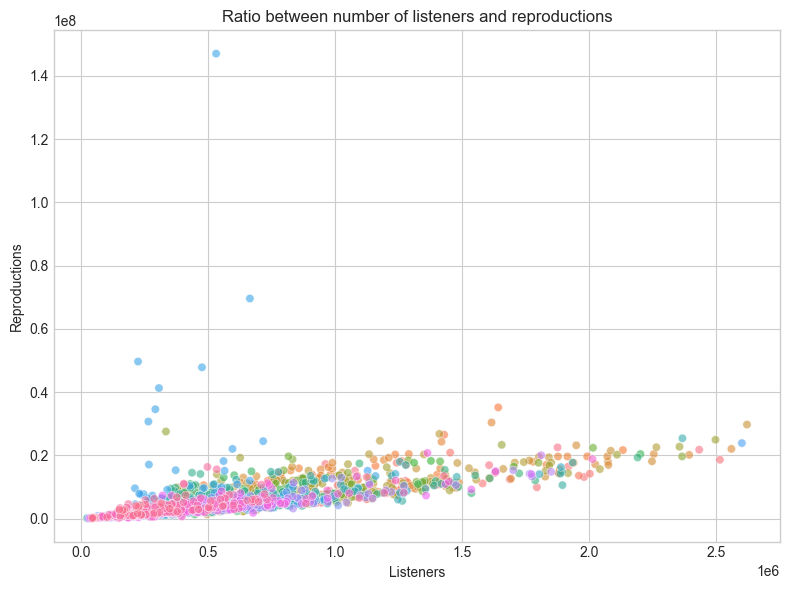

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="listeners", y="playcount", hue="artist", alpha=0.6, legend=False)
plt.title("Ratio between number of listeners and reproductions")
plt.xlabel("Listeners")
plt.ylabel("Reproductions")
plt.tight_layout()
plt.show()


Distribution of reproductions and listeners

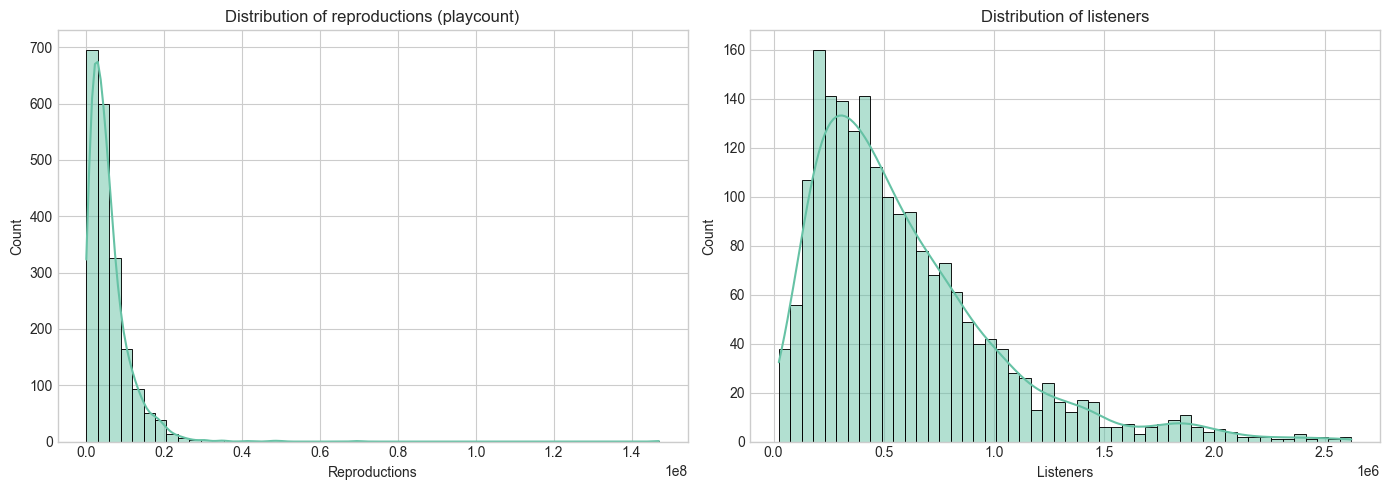

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df["playcount"], kde=True, bins=50, ax=axes[0])
axes[0].set_title("Distribution of reproductions (playcount)")
axes[0].set_xlabel("Reproductions")

sns.histplot(df["listeners"], kde=True, bins=50, ax=axes[1])
axes[1].set_title("Distribution of listeners")
axes[1].set_xlabel("Listeners")

plt.tight_layout()
plt.show()


Conclusion: 
- The artists and songs with the highest number of plays on the platform were identified.
- There is a positive relationship between number of listeners and number of plays.
- The most common genres allow to understand which styles dominate on Last.fm.